# 1. Xử lý nan/null data và mất cân bằng data


> Với nan/null chúng ta có thể bổ sung bằng cách điền vào bằng giá trị trung bình của chuỗi (nếu chuỗi liên tục) hoặc điền vào bằng mod của chuỗi (nếu chuỗi là rời rạc).

> Với nan/null quá nhiều có thể cân nhắc tới việc xóa bỏ biến đó vì khi thiếu quá nhiều data thì data chúng ta điền thêm vào vô tình thành fake data, mô hình có thể đẹp nhưng lại sai với thực tế. (mức độ thế nào là quá nhiều thì không có quy định cụ thể theo quan điểm cá nhân mình nếu >5% chúng ta nên xóa bỏ, không nên fill data)


> Mất cân bằng data (vấn đề tương đối phức tạp)
> Phương pháp xử lý: (Undersampling, Oversampling, Class weights)

> Undersampling: cân bằng lại số lượng theo tỷ lệ từ 5/5 đến 6/4... bằng cách bổ sung với số liệu có tỷ lệ ít nếu có nguồn tin cậy, hoặc xóa ngẫu nhiên đối với số liệu có tỷ lệ cao (xóa theo 1 phương pháp nào đó).
> Cách tối ưu cho vấn đề mất cân bằng data là chạy mô hình với tỷ lệ gốc và chạy thêm các mô hình với tỷ lệ thay đổi khác nhau sau đó so sánh độ chính xác để có câu trả lời tối ưu

> Oversampling: SMOTE


In [ ]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
import seaborn as sns; sns.set()  

In [ ]:
#Test 2 : Predict Loan Pay Off ( Logistic Regression ) 

In [ ]:
#Data
link='hhttps://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv'

In [ ]:
#Đọc data 
predictloan = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv')

In [ ]:
#df.sample(10)
predictloan.tail(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [ ]:
predictloan = predictloan.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
predictloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [ ]:
# Tìm các giá trị đặc biệt trong các cột
from pandas.api.types import is_numeric_dtype
import string
alphabet = string.ascii_letters + string.digits #+string.punctuation
for i in predictloan.columns:
  if is_numeric_dtype(predictloan[i]) == False and predictloan[i].str.strip(alphabet).astype(bool).any() == True:
    print(i, predictloan[i].str.strip(alphabet).unique())

effective_date ['/8/' '/9/' '/10/' '/11/' '/12/' '/13/' '/14/']
due_date ['/7/' '/22/' '/8/' '/24/' '/16/' '/9/' '/10/' '/25/' '/17/' '/26/' '/11/'
 '/18/' '/19/' '/12/' '/27/' '/28/' '/13/' '/23/']
education [' School or ' '' ' or ']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Tìm các cột dạng chữ
cate_cols = []
for i in predictloan.columns:
    if is_numeric_dtype(predictloan[i]) == False:
      cate_cols.append(i)
# Tìm các cột dạng số
num_cols = []
for i in predictloan.drop(columns = ['loan_status']).columns:
    if is_numeric_dtype(predictloan[i]) == True:
      num_cols.append(i)

# Chuẩn hóa các cột dữ liệu dạng số
scaler = StandardScaler()
predictloan[num_cols] = scaler.fit_transform(predictloan[num_cols])

#Chuyển các cột dạng chữ sang số
predictloan[cate_cols] = predictloan[cate_cols].apply(LabelEncoder().fit_transform)
predictloan

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,0.515785,0.920718,5,6,2.331526,1,1
1,1,0.515785,0.920718,5,6,0.341701,0,0
2,1,0.515785,-0.959111,5,16,-0.653211,3,1
3,1,0.515785,0.920718,6,7,-0.487392,3,0
4,1,0.515785,0.920718,6,7,-0.321573,3,1
...,...,...,...,...,...,...,...,...
341,0,-1.314589,-0.959111,1,19,0.175883,1,1
342,0,0.515785,0.920718,1,0,-0.984848,1,1
343,0,-1.314589,-0.959111,2,20,1.336614,3,1
344,0,0.515785,0.920718,2,9,-0.487392,3,1


In [ ]:
y = predictloan["loan_status"].values
X= predictloan.iloc[:, :-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn import preprocessing
predictloan.loan_status = preprocessing.LabelEncoder().fit_transform(predictloan.loan_status)

In [ ]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[17,  0],
       [ 0, 87]])

Text(0.5, 12.5, 'Dự báo')

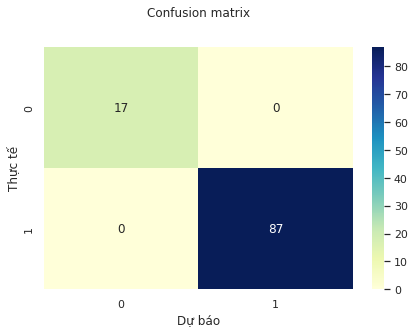

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        87

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [ ]:
#Xử lý mất cân bằng data
# Undersampling

In [ ]:
predictloan['loan_status'].value_counts() #Đếm số lượngc các giá trị trong cột y

1    260
0     86
Name: loan_status, dtype: int64

<AxesSubplot:ylabel='loan_status'>

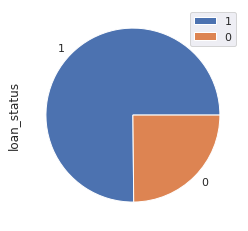

In [ ]:
predictloan['loan_status'].value_counts().plot.pie(legend = ["0", "1"])

In [ ]:
#Undersampling - Phân chia thủ công (tỷ lệ 1:1)
predictloan_0=predictloan[predictloan.loan_status==0] #Chia bảng data theo nhóm có y=0
predictloan_1=predictloan[predictloan.loan_status==1] #Chia bảng data theo nhóm có y=1
predictloan_0.shape, predictloan_1.shape # In ra size của từng bảng data

((86, 8), (260, 8))

In [ ]:
predictloan_1_resapled=predictloan_1.sample(86) # Lấy ngẫu nhiên 40 dòng dữ liệu từ bảng data chứa y=0

In [ ]:
predictloan_1_resapled.shape #In ra kích thước của bảng data mới 

(86, 8)

In [ ]:
predictloan_under=pd.concat([predictloan_1_resapled,predictloan_0]) #Nối hai bảng data chứa y=0 và y=1

In [ ]:
#Chia lại X, y và chạy lại mô hình
y = predictloan_under['loan_status'].values
X=predictloan_under.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        24

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



Text(0.5, 12.5, 'Dự báo')

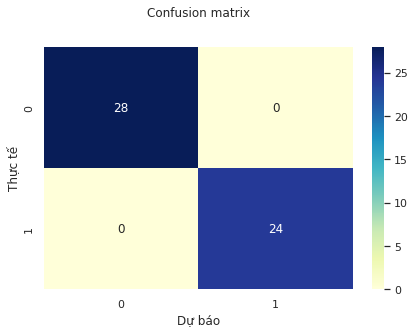

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#Undersampling - Phân chia tự động bằng phương pháp NearMiss
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


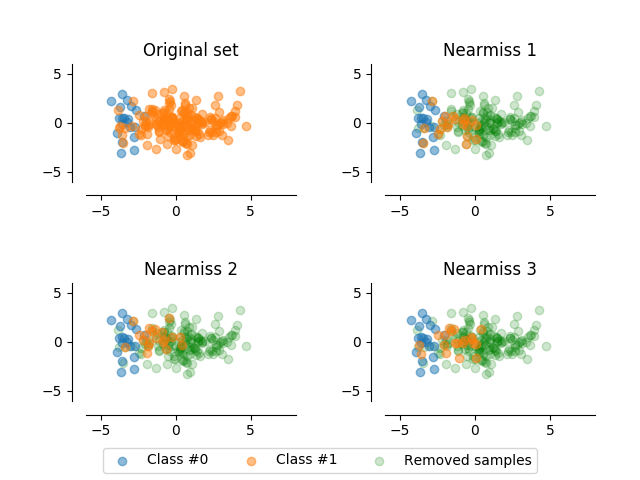

> NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.

> NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.

> NearMiss-3: Majority class examples with minimum distance to each minority class example.

In [ ]:
#Load lại data của X và y từ bảng data gốc
y = predictloan['loan_status'].values
X=predictloan.iloc[:, :-1].values

In [ ]:
from imblearn.under_sampling import NearMiss
NearMiss_Model=NearMiss(version=2) # Chúng ta có 3 phương pháp NearMiss 1,2,3
X_under, y_under=NearMiss_Model.fit_resample(X,y)
X_under.shape, y_under.shape #Kích thước của X và y đã được lấy mẫu lại

((172, 7), (172,))

In [ ]:
np.count_nonzero(y_under == 1) #Đếm giá trị 1 của y_under

86

In [ ]:
#Chia lại X, y và chạy lại mô hình
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        28

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



Text(0.5, 12.5, 'Dự báo')

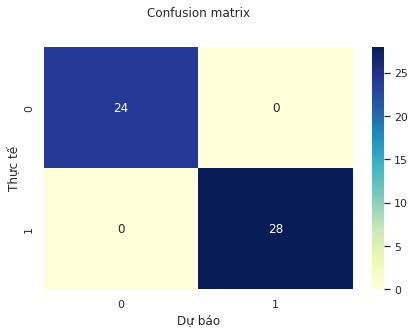

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#Oversampling
# imblearn
from imblearn.over_sampling import RandomOverSampler
y = predictloan['loan_status'].values #Load lại X, y từ bảng data gốc
X=predictloan.iloc[:, :-1].values
ROS_Model=RandomOverSampler()
X_over, y_over=ROS_Model.fit_resample(X,y)
X_over.shape, y_over.shape

((520, 7), (520,))

In [ ]:
np.count_nonzero(y_over == 1)

260

In [ ]:
#Chia lại X, y và chạy lại mô hình
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        81

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



Text(0.5, 12.5, 'Dự báo')

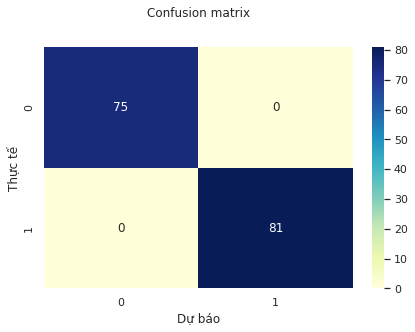

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
#Oversampling
# SMOTE (Synthetic Minority Over-sampling)

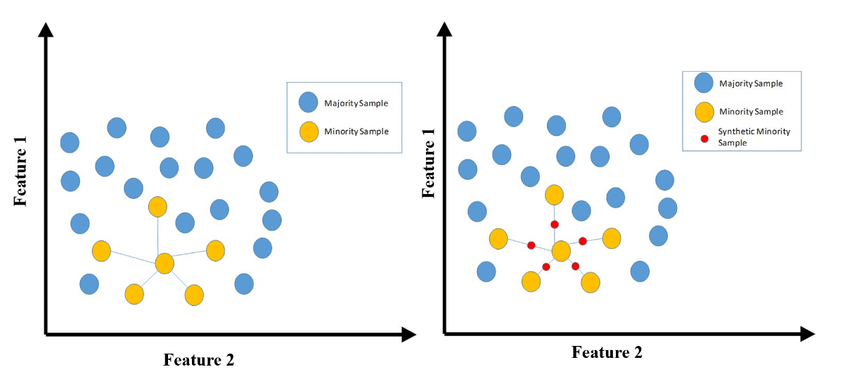

In [ ]:
from imblearn.over_sampling import SMOTE
y = predictloan['loan_status'].values #Load lại X, y tù bảng data gốc
X=predictloan.iloc[:, :-1].values
SM_Model=SMOTE()
X_SM, y_SM=ROS_Model.fit_resample(X,y)
X_SM.shape, y_SM.shape

((520, 7), (520,))

In [ ]:
#Chia lại X, y và chạy lại mô hình
X_train, X_test, y_train, y_test = train_test_split(X_SM, y_SM, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        81

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

